In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#OBSERVATIONS:
- There are 4 Numerical columns (int64(2),float64(2))
- Three Categorical columns
- There are No Missing Values (Non Null)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Outliers are not Present

- Based on above Data Minimum Medical Cost  is  **1121.873900**

- Based on above Data Average Medical Cost is   **13270.422265**

- Based on above Data Maximum Medical Cost is    **63770.428010**

- The Standard deviation of Medical Cost is     **12110.011237**


<Axes: xlabel='sex', ylabel='charges'>

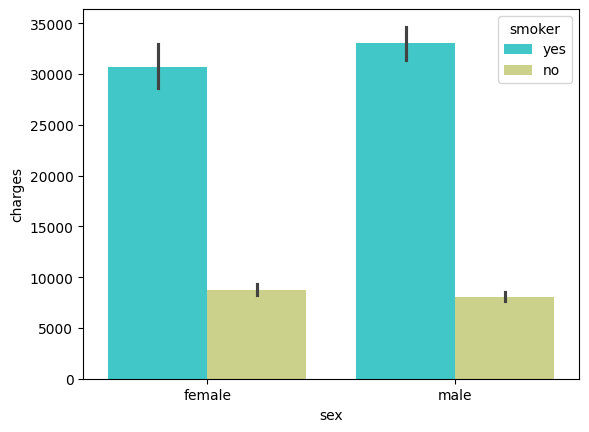

In [ ]:
sns.barplot(x='sex',y='charges',data=data,palette='rainbow',hue = 'smoker')

<Axes: xlabel='region', ylabel='charges'>

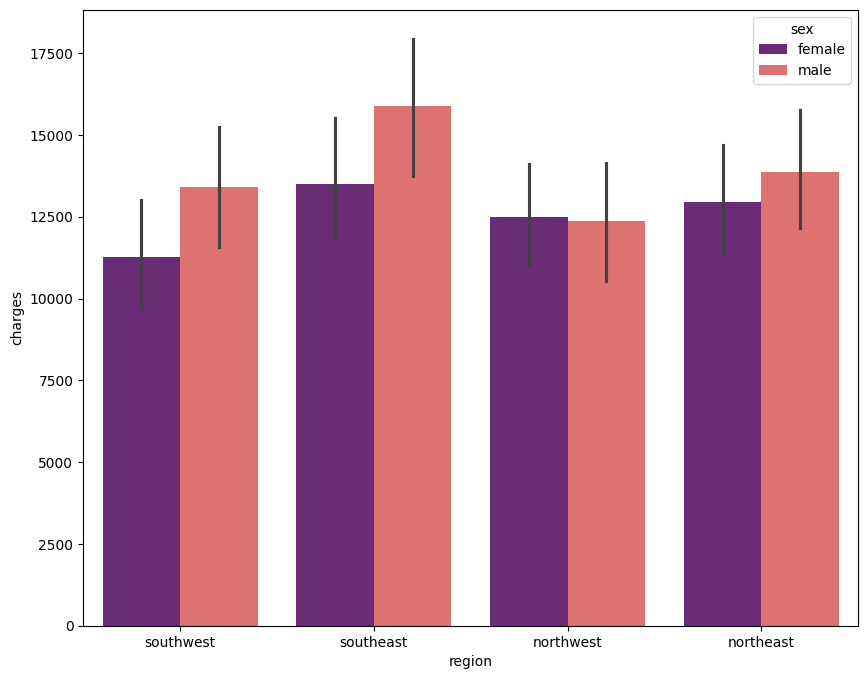

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='charges',data=data,palette='magma',hue='sex')

In [ ]:
data['age_group']=pd.cut(data['age'],
       bins=[10,20,30,40,max(data['age'])],
       labels = ['10-20','20-30','30-40','40+'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,10-20
1,18,male,33.770,1,no,southeast,1725.55230,10-20
2,28,male,33.000,3,no,southeast,4449.46200,20-30
3,33,male,22.705,0,no,northwest,21984.47061,30-40
4,32,male,28.880,0,no,northwest,3866.85520,30-40


<Axes: xlabel='age_group', ylabel='charges'>

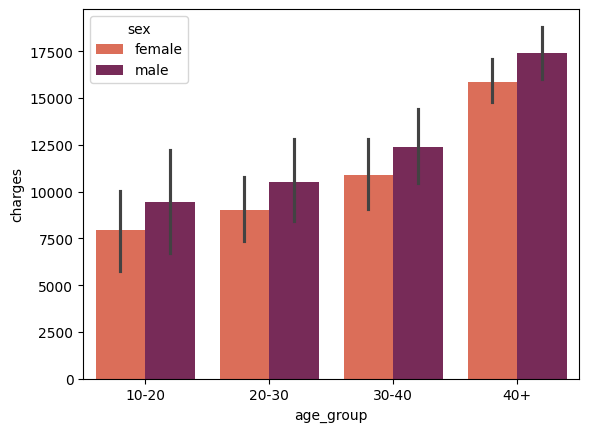

In [ ]:
sns.barplot(x='age_group',y='charges',data=data,palette='rocket_r',hue='sex')

In [ ]:
data['bmi_group'] = pd.cut(data['bmi'],bins=[10,20,30,40,max(data['bmi'])],labels=['10-20','20-30','30-40','40+'])

<Axes: xlabel='bmi_group', ylabel='charges'>

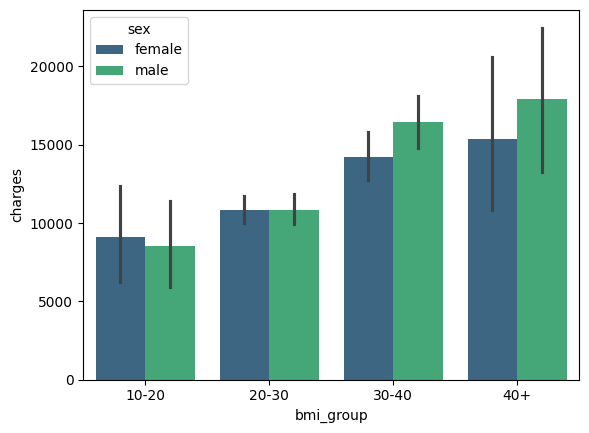

In [ ]:
sns.barplot(x='bmi_group',y='charges',data=data,palette='viridis',hue='sex')

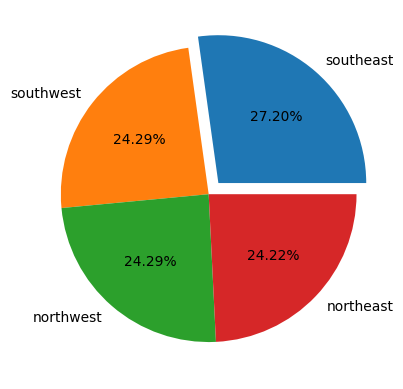

In [ ]:
plt.pie(data['region'].value_counts(),labels=data['region'].value_counts().index,autopct='%1.2f%%',explode=[0.1,0,0,0]);

<Axes: xlabel='children', ylabel='charges'>

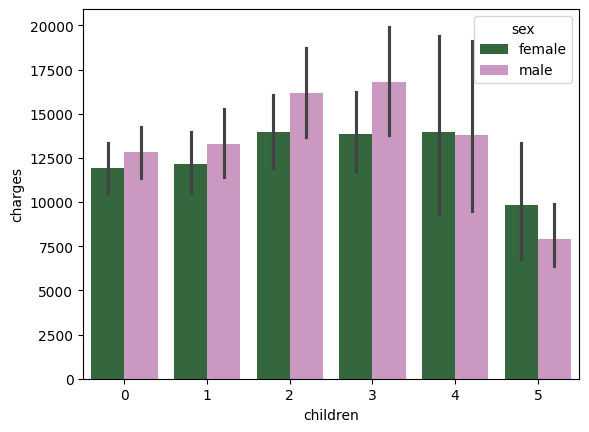

In [ ]:
sns.barplot(x='children',y='charges',data=data,palette='cubehelix',hue='sex')

# **Insights**




1. **Male customers from the Southeast region are claiming higher medical charges.**

2. **Male customers aged 40+ with a BMI of 40+ are incurring higher medical costs.**

3. **Male customers with a BMI between 10-20 are claiming lower medical charges.**

4. **Female customers aged 10-20 are claiming lower medical expenses.**

5. **Male smokers and female non-smokers are claiming higher medical charges.**

6. **Customers with 2 or 3 children are claiming higher medical costs, while those with fewer or more children are claiming lower expenses.**

7. **The minimum medical claim is 1,121.87.**

8. **The maximum medical claim is 63,770.43.**



# Data Preprocessing

In [ ]:
x = data.drop('charges',axis=1)
y = data['charges']

In [ ]:
x['sex'] = x['sex'].map({'male':0,'female':1})
x['smoker'] = x['smoker'].map({'yes':1,'no':0})
x['age_group'] = x['age_group'].astype('O')
x['bmi_group'] = x['bmi_group'].astype('O')


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   region     1338 non-null   object 
 6   age_group  1338 non-null   object 
 7   bmi_group  1338 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
numerical_columns = x.select_dtypes(exclude='O').columns
categorical_columns = x.select_dtypes(include='O').columns
print(f'Numerical Columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}')

Numerical Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')
Categorical Columns: Index(['region', 'age_group', 'bmi_group'], dtype='object')


In [ ]:
# Numerical pipeline: Handling missing values and scaling
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', MinMaxScaler())  # Standardize numerical features
])

# Categorical pipeline: Handling missing values and encoding
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Preprocessor (ColumnTransformer) that applies each pipeline to the respective columns
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_columns),
    ('cat_pipeline', cat_pipeline, categorical_columns)
])

# Apply the transformations
X_transformed = preprocessor.fit_transform(x)

# Create a DataFrame for the transformed data
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Display the transformed data
X_transformed_df.head()

,num_pipeline__age,num_pipeline__sex,num_pipeline__bmi,num_pipeline__children,num_pipeline__smoker,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest,cat_pipeline__age_group_10-20,cat_pipeline__age_group_20-30,cat_pipeline__age_group_30-40,cat_pipeline__age_group_40+,cat_pipeline__bmi_group_10-20,cat_pipeline__bmi_group_20-30,cat_pipeline__bmi_group_30-40,cat_pipeline__bmi_group_40+
0,0.021739,1.0,0.321227,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.0,0.479150,0.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_transformed_df,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 17), (268, 17), (1070,), (268,))

# Model Building

In [ ]:
def evaluate_models(X_train, y_train,X_test,y_test,models):
        report = {}
        train_score = []
        for i in range(len(list(models))):
            model = list(models.values())[i]



            model.fit(X_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = r2_score(y_train, y_train_pred)
            train_score.append(train_model_score)

            test_model_score = r2_score(y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report

In [ ]:
models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }
report = evaluate_models(x_train, y_train,x_test,y_test,models)
report


{'Random Forest': 0.8595955140099786,
 'Decision Tree': 0.7433730381344903,
 'Gradient Boosting': 0.8781513160918271,
 'Linear Regression': 0.7838402443536999,
 'XGBRegressor': 0.8430738115590412,
 'CatBoosting Regressor': 0.8662685172039819,
 'AdaBoost Regressor': 0.7999951774867949}

# Hyper parameter Tuning

In [ ]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):

        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = r2_score(y_train, y_train_pred)

            test_model_score = r2_score(y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report

In [ ]:
models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }
params={
                "Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'splitter':['best','random'],
                    # 'max_features':['sqrt','log2'],
                },
                "Random Forest":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],

                    # 'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Gradient Boosting":{
                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    # 'criterion':['squared_error', 'friedman_mse'],
                    # 'max_features':['auto','sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Linear Regression":{},
                "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "CatBoosting Regressor":{
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                },
                "AdaBoost Regressor":{
                    'learning_rate':[.1,.01,0.5,.001],
                    # 'loss':['linear','square','exponential'],
                    'n_estimators': [8,16,32,64,128,256]
                }

            }

In [ ]:
model_report:dict=evaluate_models(X_train=x_train,y_train=y_train,X_test=x_test,y_test=y_test,
                                             models=models,param=params)

In [ ]:
model_report

{'Random Forest': 0.8608412060145182,
 'Decision Tree': 0.74695270103008,
 'Gradient Boosting': 0.8751893420905723,
 'Linear Regression': 0.7838402443536999,
 'XGBRegressor': 0.8778362043989367,
 'CatBoosting Regressor': 0.8779816429877706,
 'AdaBoost Regressor': 0.8560381190535113}